In [1]:
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Audio

import tensorflow as tf
import tensorflow_io as tfio

%matplotlib inline

### Meta data (from csv file)

In [2]:
#url='https://drive.google.com/file/d/1rk9luc1DICD492x-t9avH2sDpXmGBnKO/view?usp=sharing'
#url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
url_local = '/home/benoit/Downloads/metadata.csv'
df = pd.read_csv(url_local)


In [3]:
df = pd.DataFrame(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recording_ID       2150 non-null   int64  
 1   Genus              2150 non-null   object 
 2   Specific_epithet   2150 non-null   object 
 3   Subspecies         249 non-null    object 
 4   English_name       2150 non-null   object 
 5   Recordist          2150 non-null   object 
 6   Country            2150 non-null   object 
 7   Locality           2149 non-null   object 
 8   Latitude           2106 non-null   float64
 9   Longitude          2106 non-null   float64
 10  Vocalization_type  2150 non-null   object 
 11  Audio_file         2150 non-null   object 
 12  License            2150 non-null   object 
 13  Url                2150 non-null   object 
 14  Quality            2150 non-null   object 
 15  Time               2150 non-null   object 
 16  Date               2150 

In [5]:
df.describe()

Recording_ID     Latitude    Longitude  Other_species23  \
count    2150.000000  2106.000000  2106.000000              0.0   
mean   287960.094884    51.254397    12.561763              NaN   
std    125138.896517     6.559085    14.427008              NaN   
min     25564.000000    28.358100   -16.501700              NaN   
25%    181361.250000    48.826600    -0.544500              NaN   
50%    266743.500000    52.930700    11.272000              NaN   
75%    387342.500000    54.124600    21.902325              NaN   
max    537177.000000    70.083600    59.635200              NaN   

       Other_species24  Other_species25  Other_species26  Other_species27  \
count              0.0              0.0              0.0              0.0   
mean               NaN              NaN              NaN              NaN   
std                NaN              NaN              NaN              NaN   
min                NaN              NaN              NaN              NaN   
25%                NaN              NaN              NaN              NaN   
50%                NaN              NaN              NaN              NaN   
75%                NaN              NaN              NaN              NaN   
max                NaN              NaN              NaN              NaN   

       Other_species28  Other_species29  Other_species30  
count              0.0              0.0              0.0  
mean               NaN              NaN              NaN  
std                NaN              NaN              NaN  
min                NaN              NaN              NaN  
25%                NaN              NaN              NaN  
50%                NaN              NaN              NaN  
75%                NaN              NaN              NaN  
max                NaN              NaN              NaN

/home/benoit/.pyenv/versions/3.8.6/envs/birds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


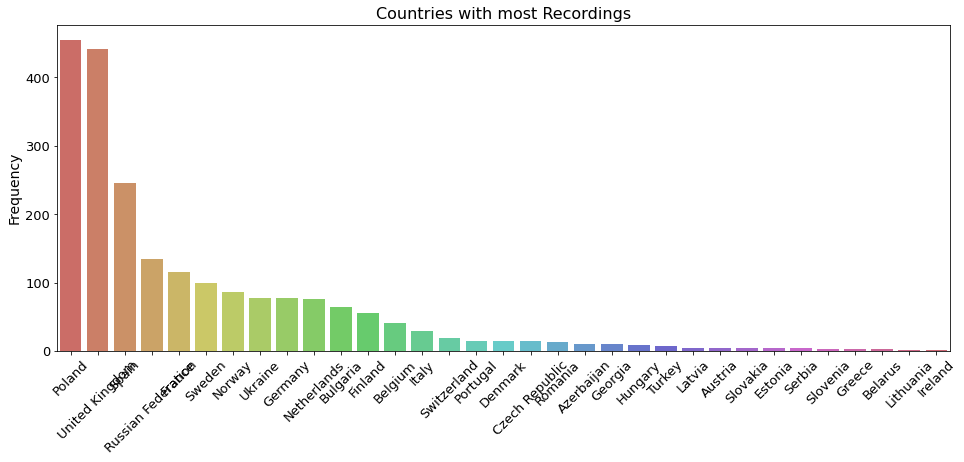

In [6]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(df['Country'], palette='hls', order = df['Country'].value_counts().index)

plt.title("Countries with most Recordings", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("");

/home/benoit/.pyenv/versions/3.8.6/envs/birds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


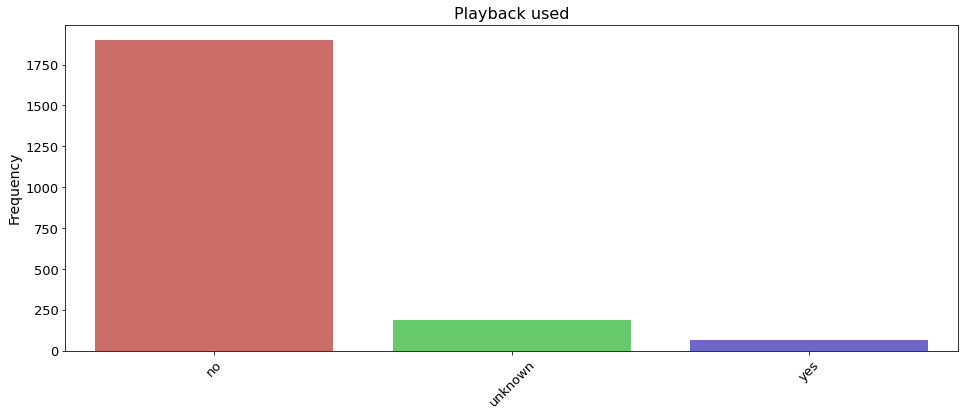

In [7]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(df['Playback_used'], palette='hls', order = df['Playback_used'].value_counts().index)

plt.title("Playback used", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("");

In [8]:
#Get source folder
folder_url='/home/benoit/Downloads/mp3/'

#Get mp3 files paths from metadata.csv (column 'Path')
file_urls_df = pd.DataFrame(df['Path'])

In [9]:
#file_urls_df['Path']

In [10]:
#Create empty path list
path_list = []

#Append each 2150 split paths into pathlist and concatenate with folder source name
for file in file_urls_df['Path']:
    path_list.append(folder_url + file.split("//")[-1])

In [11]:
path_list

['/home/benoit/Downloads/mp3/Sonus-naturalis-356824.mp3',
 '/home/benoit/Downloads/mp3/Sonus-naturalis-317951.mp3',
 '/home/benoit/Downloads/mp3/Sonus-naturalis-508571.mp3',
 '/home/benoit/Downloads/mp3/Sonus-naturalis-448534.mp3',
 '/home/benoit/Downloads/mp3/Sonus-naturalis-373414.mp3',
 '/home/benoit/Downloads/mp3/Sonus-naturalis-358040.mp3',
 '/home/benoit/Downloads/mp3/Sonus-naturalis-331475.mp3',
 '/home/benoit/Downloads/mp3/Sonus-naturalis-330799.mp3',
 '/home/benoit/Downloads/mp3/Sonus-naturalis-442463.mp3',
 '/home/benoit/Downloads/mp3/Sonus-naturalis-409981.mp3',
 '/home/benoit/Downloads/mp3/Sonus-naturalis-447407.mp3',
 '/home/benoit/Downloads/mp3/Sonus-naturalis-387437.mp3',
 '/home/benoit/Downloads/mp3/Sonus-naturalis-383228.mp3',
 '/home/benoit/Downloads/mp3/Sonus-naturalis-358240.mp3',
 '/home/benoit/Downloads/mp3/Sonus-naturalis-397031.mp3',
 '/home/benoit/Downloads/mp3/Sonus-naturalis-448679.mp3',
 '/home/benoit/Downloads/mp3/Sonus-naturalis-336380.mp3',
 '/home/benoit

In [12]:
#Create local destination folder
!mkdir /home/benoit/code/charlottesuaud/birds/raw_data

!mkdir /home/benoit/code/charlottesuaud/birds/raw_data/data_10s
!mkdir /home/benoit/code/charlottesuaud/birds/raw_data/data_30s

!mkdir /home/benoit/code/charlottesuaud/birds/raw_data/data_10s/train
!mkdir /home/benoit/code/charlottesuaud/birds/raw_data/data_10s/test

!mkdir /home/benoit/code/charlottesuaud/birds/raw_data/data_30s/train
!mkdir /home/benoit/code/charlottesuaud/birds/raw_data/data_30s/test


mkdir: cannot create directory ‘/home/benoit/code/charlottesuaud/birds/raw_data’: File exists
mkdir: cannot create directory ‘/home/benoit/code/charlottesuaud/birds/raw_data/data_10s’: File exists
mkdir: cannot create directory ‘/home/benoit/code/charlottesuaud/birds/raw_data/data_30s’: File exists
mkdir: cannot create directory ‘/home/benoit/code/charlottesuaud/birds/raw_data/data_10s/train’: File exists
mkdir: cannot create directory ‘/home/benoit/code/charlottesuaud/birds/raw_data/data_10s/test’: File exists
mkdir: cannot create directory ‘/home/benoit/code/charlottesuaud/birds/raw_data/data_30s/train’: File exists
mkdir: cannot create directory ‘/home/benoit/code/charlottesuaud/birds/raw_data/data_30s/test’: File exists


In [15]:
#import librosa #Might be useful later
import soundfile as sf

# Testing audio slicing on one single file
TARGET_SPLIT_DURATION_SEC = 30

audio1 = tfio.audio.AudioIOTensor('/home/benoit/Downloads/mp3/Sylvia-curruca-206640.mp3')
split_index1 = audio1.rate.numpy() * TARGET_SPLIT_DURATION_SEC

# Slice audio using index to keep only first TARGET_SPLIT_DURATION_SEC
audio_slice1 = audio1[:split_index1]
filename = 'Sylvia-curruca-206640_tens.ogg'

sf.write(filename, audio_slice1, audio1.rate.numpy(), format='ogg')

#encoded_audio1 = tfio.audio.encode_wav(audio_slice1, audio1.rate.numpy())
#type(encoded_audio1)
#type(audio1)

In [16]:
#audio2 = tfio.audio.AudioIOTensor(filename)

audio2, samplerate = sf.read(filename)

In [17]:
audio2.T.shape, samplerate

((2, 1440000), 48000)

In [18]:
Audio(audio2.T, rate = samplerate)

In [19]:
# On suppose audio = tfio.audio.AudioIOTensor(file)
# Get audio length (seconds) : divide tensor length by audio rate
#audio_length_sec = audio.shape.numpy()[0]/audio.rate.numpy()


def slice_files(path_list, format, duration):
# Get split index adequate to audio rate
    filenames = []
# Define format

    for path in path_list:
        
        #slice original path to get new file base name
        # e.g: '/home/benoit/Downloads/mp3/Sylvia-curruca-206640.mp3'
        file_with_suffix = path.split('/')[-1]
    
        #slice original path to get rid of previous format suffix
        # e.g: 'Sylvia-curruca-206640.mp3'
        raw_path = file_with_suffix.split('.')[0]
        
        #Load audio with tfio Audio IO Tensor
        audio = tfio.audio.AudioIOTensor(path)
        
        #Define split index according to duration
        split_index = audio.rate.numpy() * duration
        # e.g: 'Sylvia-curruca-206640'
    
        # Slice audio using index to keep only first TARGET_SPLIT_DURATION_SEC
        audio_slice = audio[:split_index]
    
        # Define new file name with '_tens' suffix and .ogg format
        filename = raw_path +'_tens' +'.' + format
        filenames.append(filename)
        # Create a new file with correct format
        file = sf.write(filename, audio_slice, audio.rate.numpy(), format=format)
    return filenames


In [20]:
!pwd


/home/benoit/code/charlottesuaud/birds/raw_data/data_30s/train


In [21]:
path_list_train = []
path_list_test = []
for i in range(0, 2150, 43):

    for j in range(0,10):
        path_list_test.append(path_list[i+j])
    for k in range(10,43):
        path_list_train.append(path_list[i+k])

In [22]:
slice_files(path_list_train, 'ogg', 30)



['Sonus-naturalis-447407_tens.ogg',
 'Sonus-naturalis-387437_tens.ogg',
 'Sonus-naturalis-383228_tens.ogg',
 'Sonus-naturalis-358240_tens.ogg',
 'Sonus-naturalis-397031_tens.ogg',
 'Sonus-naturalis-448679_tens.ogg',
 'Sonus-naturalis-336380_tens.ogg',
 'Sonus-naturalis-358250_tens.ogg',
 'Sonus-naturalis-411631_tens.ogg',
 'Sonus-naturalis-373438_tens.ogg',
 'Sonus-naturalis-381712_tens.ogg',
 'Sonus-naturalis-446222_tens.ogg',
 'Sonus-naturalis-356817_tens.ogg',
 'Sonus-naturalis-172725_tens.ogg',
 'Sonus-naturalis-383305_tens.ogg',
 'Sonus-naturalis-322006_tens.ogg',
 'Sonus-naturalis-377845_tens.ogg',
 'Sonus-naturalis-400241_tens.ogg',
 'Sonus-naturalis-156938_tens.ogg',
 'Sonus-naturalis-347360_tens.ogg',
 'Sonus-naturalis-347733_tens.ogg',
 'Sonus-naturalis-363575_tens.ogg',
 'Sonus-naturalis-403183_tens.ogg',
 'Sonus-naturalis-335727_tens.ogg',
 'Sonus-naturalis-442536_tens.ogg',
 'Sonus-naturalis-387059_tens.ogg',
 'Sonus-naturalis-335728_tens.ogg',
 'Sonus-naturalis-386953_ten

In [26]:
#filenames

NameError: name 'filenames' is not defined